In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
#from pysal.viz import splot
#from splot.esda import plot_moran
#import contextily

# Analysis
#from pysal.explore import esda
from libpysal import weights
from numpy.random import seed

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

ModuleNotFoundError: No module named 'libpysal'

In [3]:
mun_tourist_gdf= gpd.read_file(os.path.join('data','agg_mun_tourist.geojson'),driver='GeoJSON')
#mun_tourist_gdf['Viv-total'] = pd.to_numeric(mun_tourist_gdf['Viv-total'])

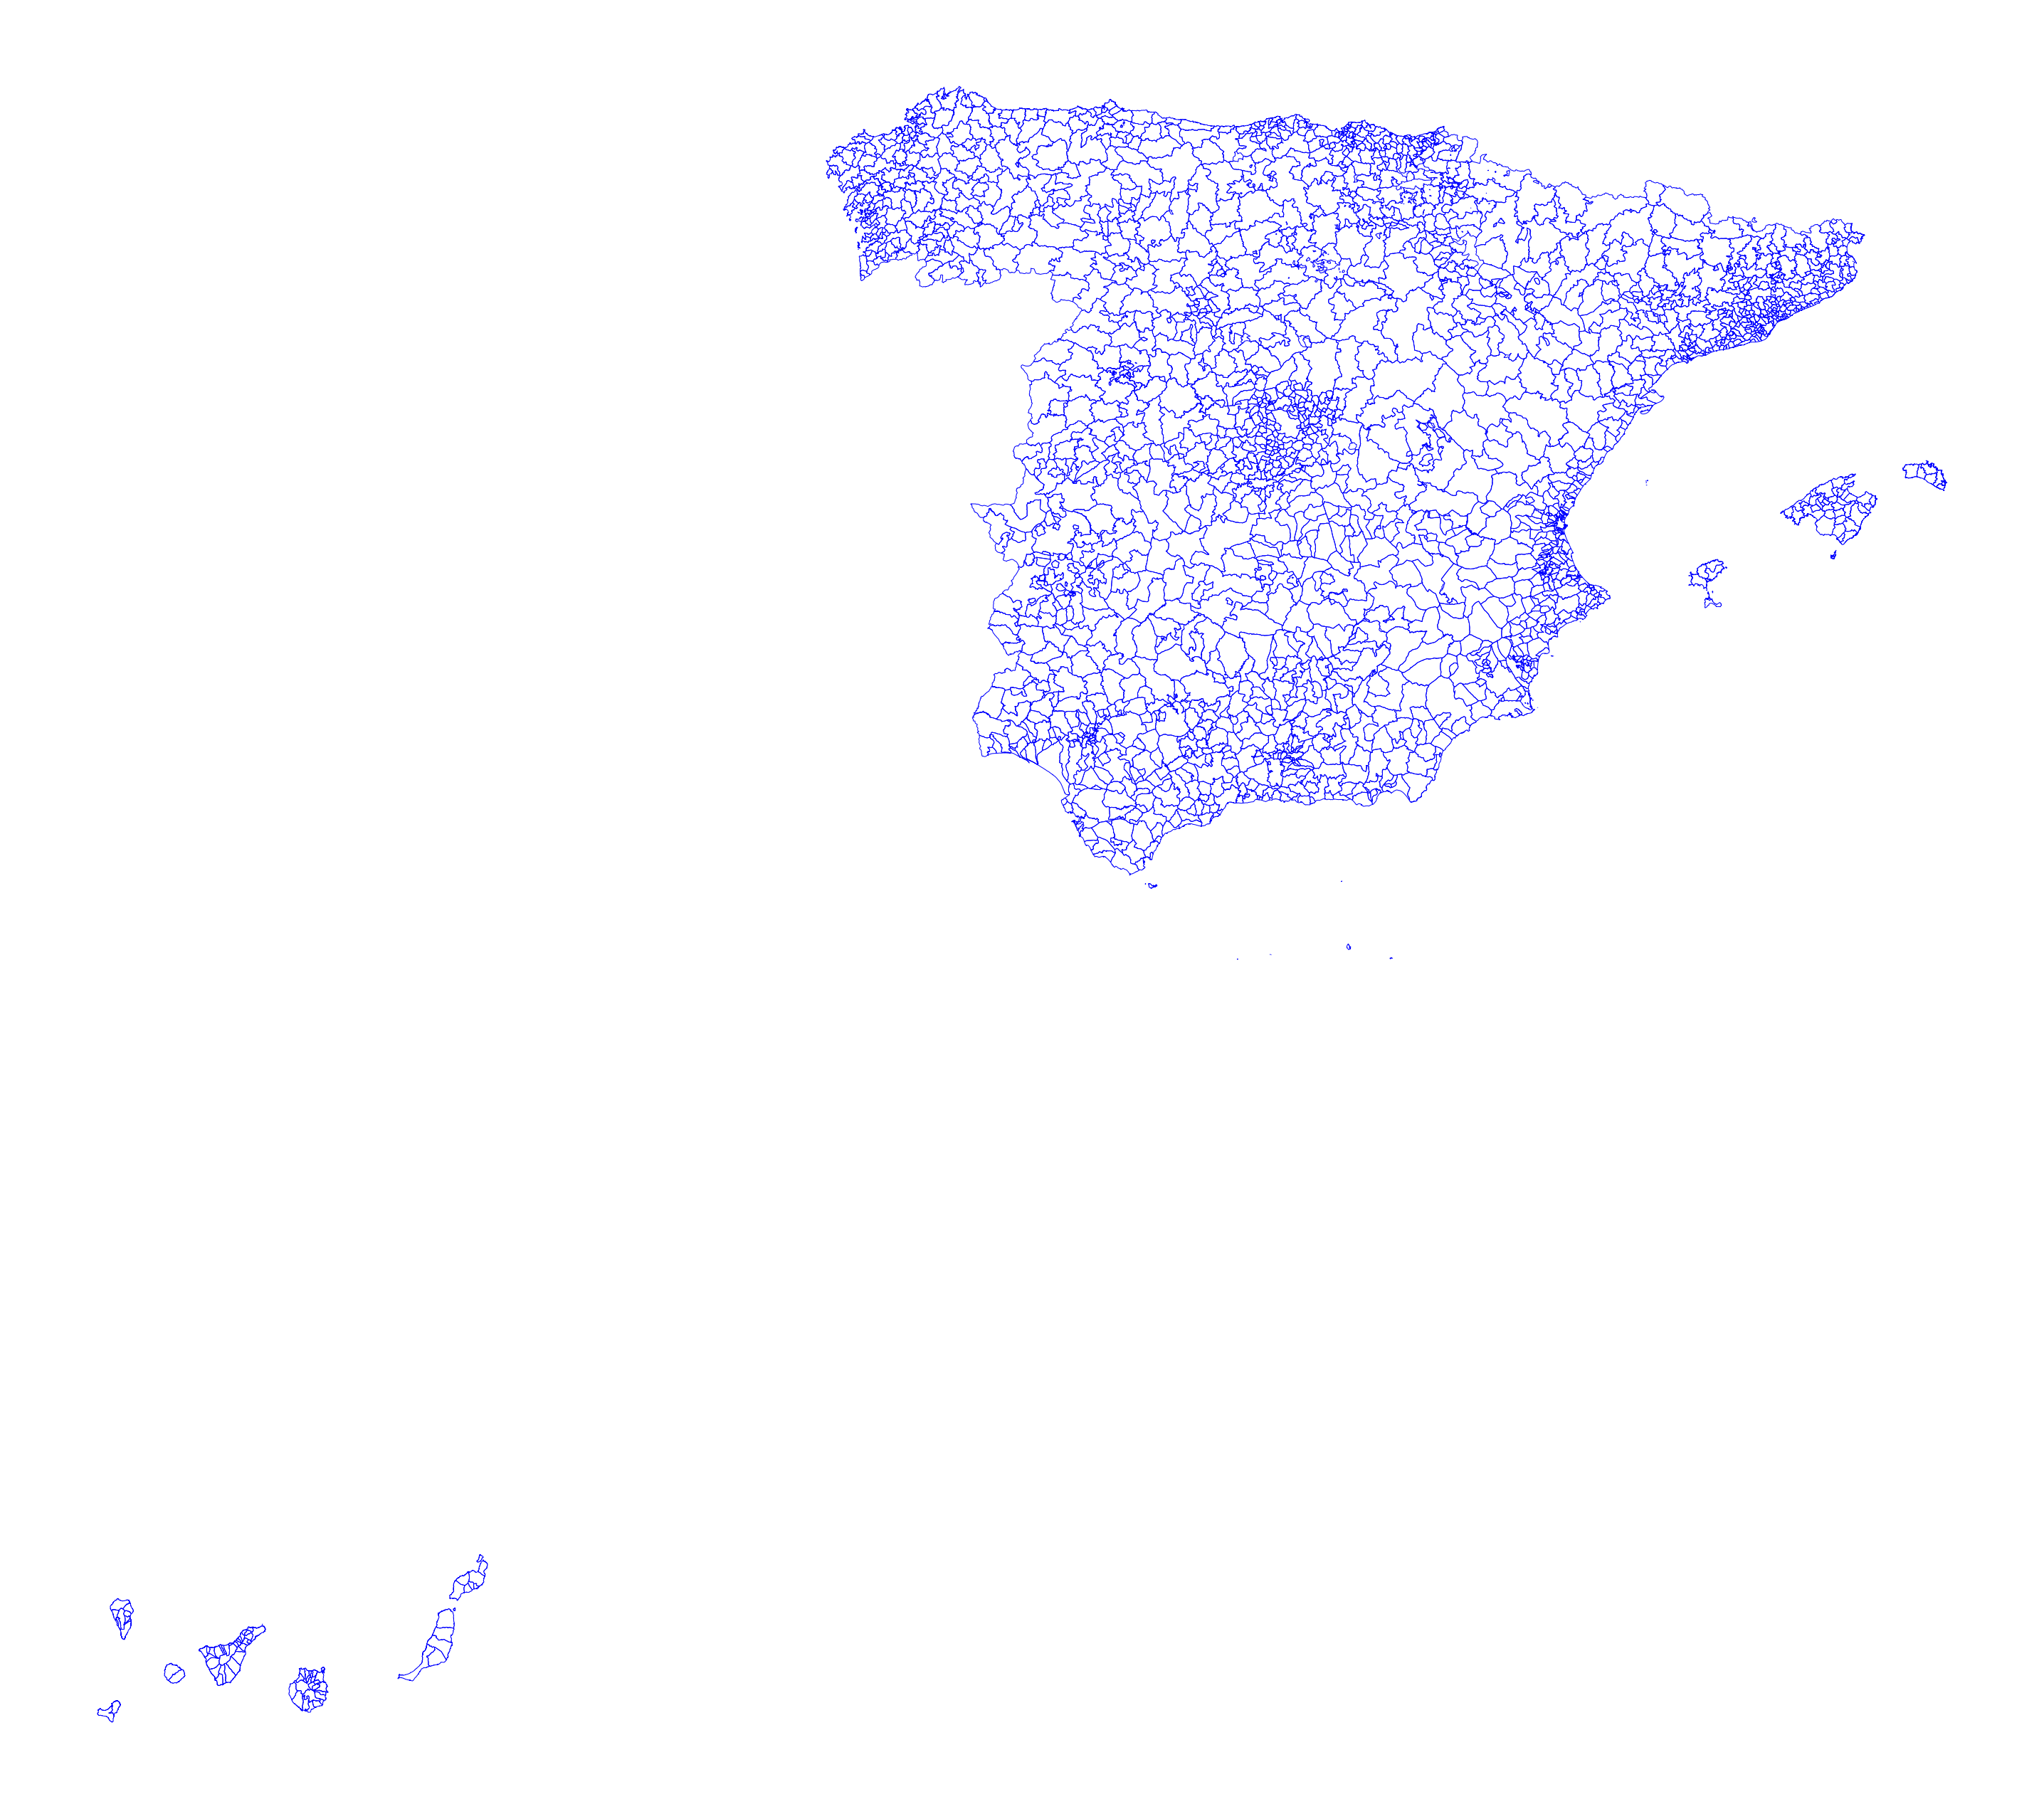

In [14]:
ax=mun_tourist_gdf.plot(figsize=(40,40), color='white');
mun_tourist_gdf.boundary.plot(ax=ax, linewidth=1.0, color='blue');
ax.set_axis_off()
plt.tight_layout()
plt.savefig(os.path.join('figs', 'zones_common.png'))

In [3]:
mun_tourist_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   primary_key      3295 non-null   object  
 1   area_km2         3295 non-null   float64 
 2   Viv-total        3295 non-null   float64 
 3   hotels-total     3295 non-null   float64 
 4   camps-total      3295 non-null   float64 
 5   POB20            3295 non-null   int64   
 6   HOMBRES          3295 non-null   int64   
 7   MUJERES          3295 non-null   int64   
 8   Viv-per-area     3295 non-null   float64 
 9   hotels-per-area  3295 non-null   float64 
 10  camps-per-area   3295 non-null   float64 
 11  geometry         3295 non-null   geometry
dtypes: float64(7), geometry(1), int64(3), object(1)
memory usage: 309.0+ KB


In [4]:
mun_tourist_gdf.drop(columns='HOMBRES MUJERES'.split()).describe()

area_km2    Viv-total  hotels-total  camps-total         POB20  \
count  3295.000000  3295.000000   3295.000000  3295.000000  3.295000e+03   
mean    153.568228    45.397088      4.584219     0.276783  1.453630e+04   
std     255.106805   124.106118     14.933229     0.807068  7.520836e+04   
min       0.415000     0.000000      0.000000     0.000000  1.000000e+01   
25%      21.811500     1.000000      0.000000     0.000000  7.035000e+02   
50%      55.337000     6.000000      1.000000     0.000000  5.347000e+03   
75%     158.984500    26.000000      5.000000     0.000000  9.717500e+03   
max    2625.832000   993.000000    519.000000    16.000000  3.334730e+06   

       Viv-per-area  hotels-per-area  camps-per-area  
count   3295.000000      3295.000000     3295.000000  
mean       1.168727         0.062887        0.004456  
std        4.791104         0.207328        0.027049  
min        0.000000         0.000000        0.000000  
25%        0.008773         0.000000        0.000000  
50%        0.066004         0.012197        0.000000  
75%        0.373588         0.048917        0.000000  
max       93.020621         5.283318        0.900141

In [5]:
mun_tourist_gdf.corr()

area_km2  Viv-total  hotels-total  camps-total     POB20  \
area_km2         1.000000   0.050154      0.242809     0.259250  0.056889   
Viv-total        0.050154   1.000000      0.191186     0.285081  0.146480   
hotels-total     0.242809   0.191186      1.000000     0.219805  0.833938   
camps-total      0.259250   0.285081      0.219805     1.000000  0.064176   
POB20            0.056889   0.146480      0.833938     0.064176  1.000000   
HOMBRES          0.058865   0.150687      0.832806     0.066555  0.999840   
MUJERES          0.055113   0.142693      0.834722     0.062039  0.999873   
Viv-per-area    -0.109735   0.529361      0.034118     0.125530  0.058035   
hotels-per-area -0.095950   0.192168      0.490211     0.114797  0.320857   
camps-per-area  -0.059075   0.180709      0.040074     0.534391  0.019991   

                  HOMBRES   MUJERES  Viv-per-area  hotels-per-area  \
area_km2         0.058865  0.055113     -0.109735        -0.095950   
Viv-total        0.150687  0.142693      0.529361         0.192168   
hotels-total     0.832806  0.834722      0.034118         0.490211   
camps-total      0.066555  0.062039      0.125530         0.114797   
POB20            0.999840  0.999873      0.058035         0.320857   
HOMBRES          1.000000  0.999429      0.059561         0.322695   
MUJERES          0.999429  1.000000      0.056661         0.319134   
Viv-per-area     0.059561  0.056661      1.000000         0.336829   
hotels-per-area  0.322695  0.319134      0.336829         1.000000   
camps-per-area   0.020708  0.019348      0.297383         0.209334   

                 camps-per-area  
area_km2              -0.059075  
Viv-total              0.180709  
hotels-total           0.040074  
camps-total            0.534391  
POB20                  0.019991  
HOMBRES                0.020708  
MUJERES                0.019348  
Viv-per-area           0.297383  
hotels-per-area        0.209334  
camps-per-area         1.000000

In [6]:
mun_tourist_gdf.head()

primary_key  area_km2  Viv-total  hotels-total  camps-total  POB20  HOMBRES  \
0    10006_AM   336.133        4.0           8.0          0.0   5040     2594   
1    10010_AM   310.601       10.0           9.0          0.0   5728     2906   
2    10018_AM  1322.504        6.0          11.0          0.0   6581     3320   
3    10019_AM   317.487        9.0           2.0          0.0   5073     2616   
4    10020_AM   500.389       18.0           1.0          0.0   5075     2547   

   MUJERES  Viv-per-area  hotels-per-area  camps-per-area  \
0     2446      0.011900         0.023800             0.0   
1     2822      0.032196         0.028976             0.0   
2     3261      0.004537         0.008318             0.0   
3     2457      0.028348         0.006299             0.0   
4     2528      0.035972         0.001998             0.0   

                                            geometry  
0  POLYGON ((-6.20871 40.02319, -6.21719 40.01368...  
1  POLYGON ((-6.03929 39.20414, -6.03971 39.20393...  
2  MULTIPOLYGON (((-6.64781 39.42828, -6.64358 39...  
3  POLYGON ((-5.51828 39.76891, -5.51699 39.76701...  
4  POLYGON ((-6.01515 39.12930, -6.01893 39.12912...

In [7]:
mun_tourist_gdf['Viv-total'].value_counts()

0.000      675
1.000      292
2.000      204
3.000      145
4.000      121
          ... 
155.000      1
430.000      1
181.000      1
908.000      1
1.706        1
Name: Viv-total, Length: 393, dtype: int64

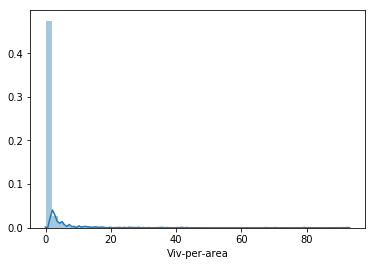

In [8]:
sns.distplot(mun_tourist_gdf['Viv-per-area']);

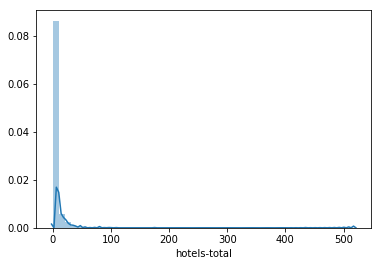

In [9]:
sns.distplot(mun_tourist_gdf['hotels-total']);

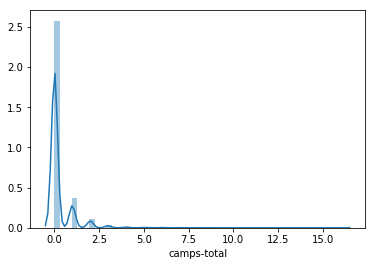

In [10]:
sns.distplot(mun_tourist_gdf['camps-total']);

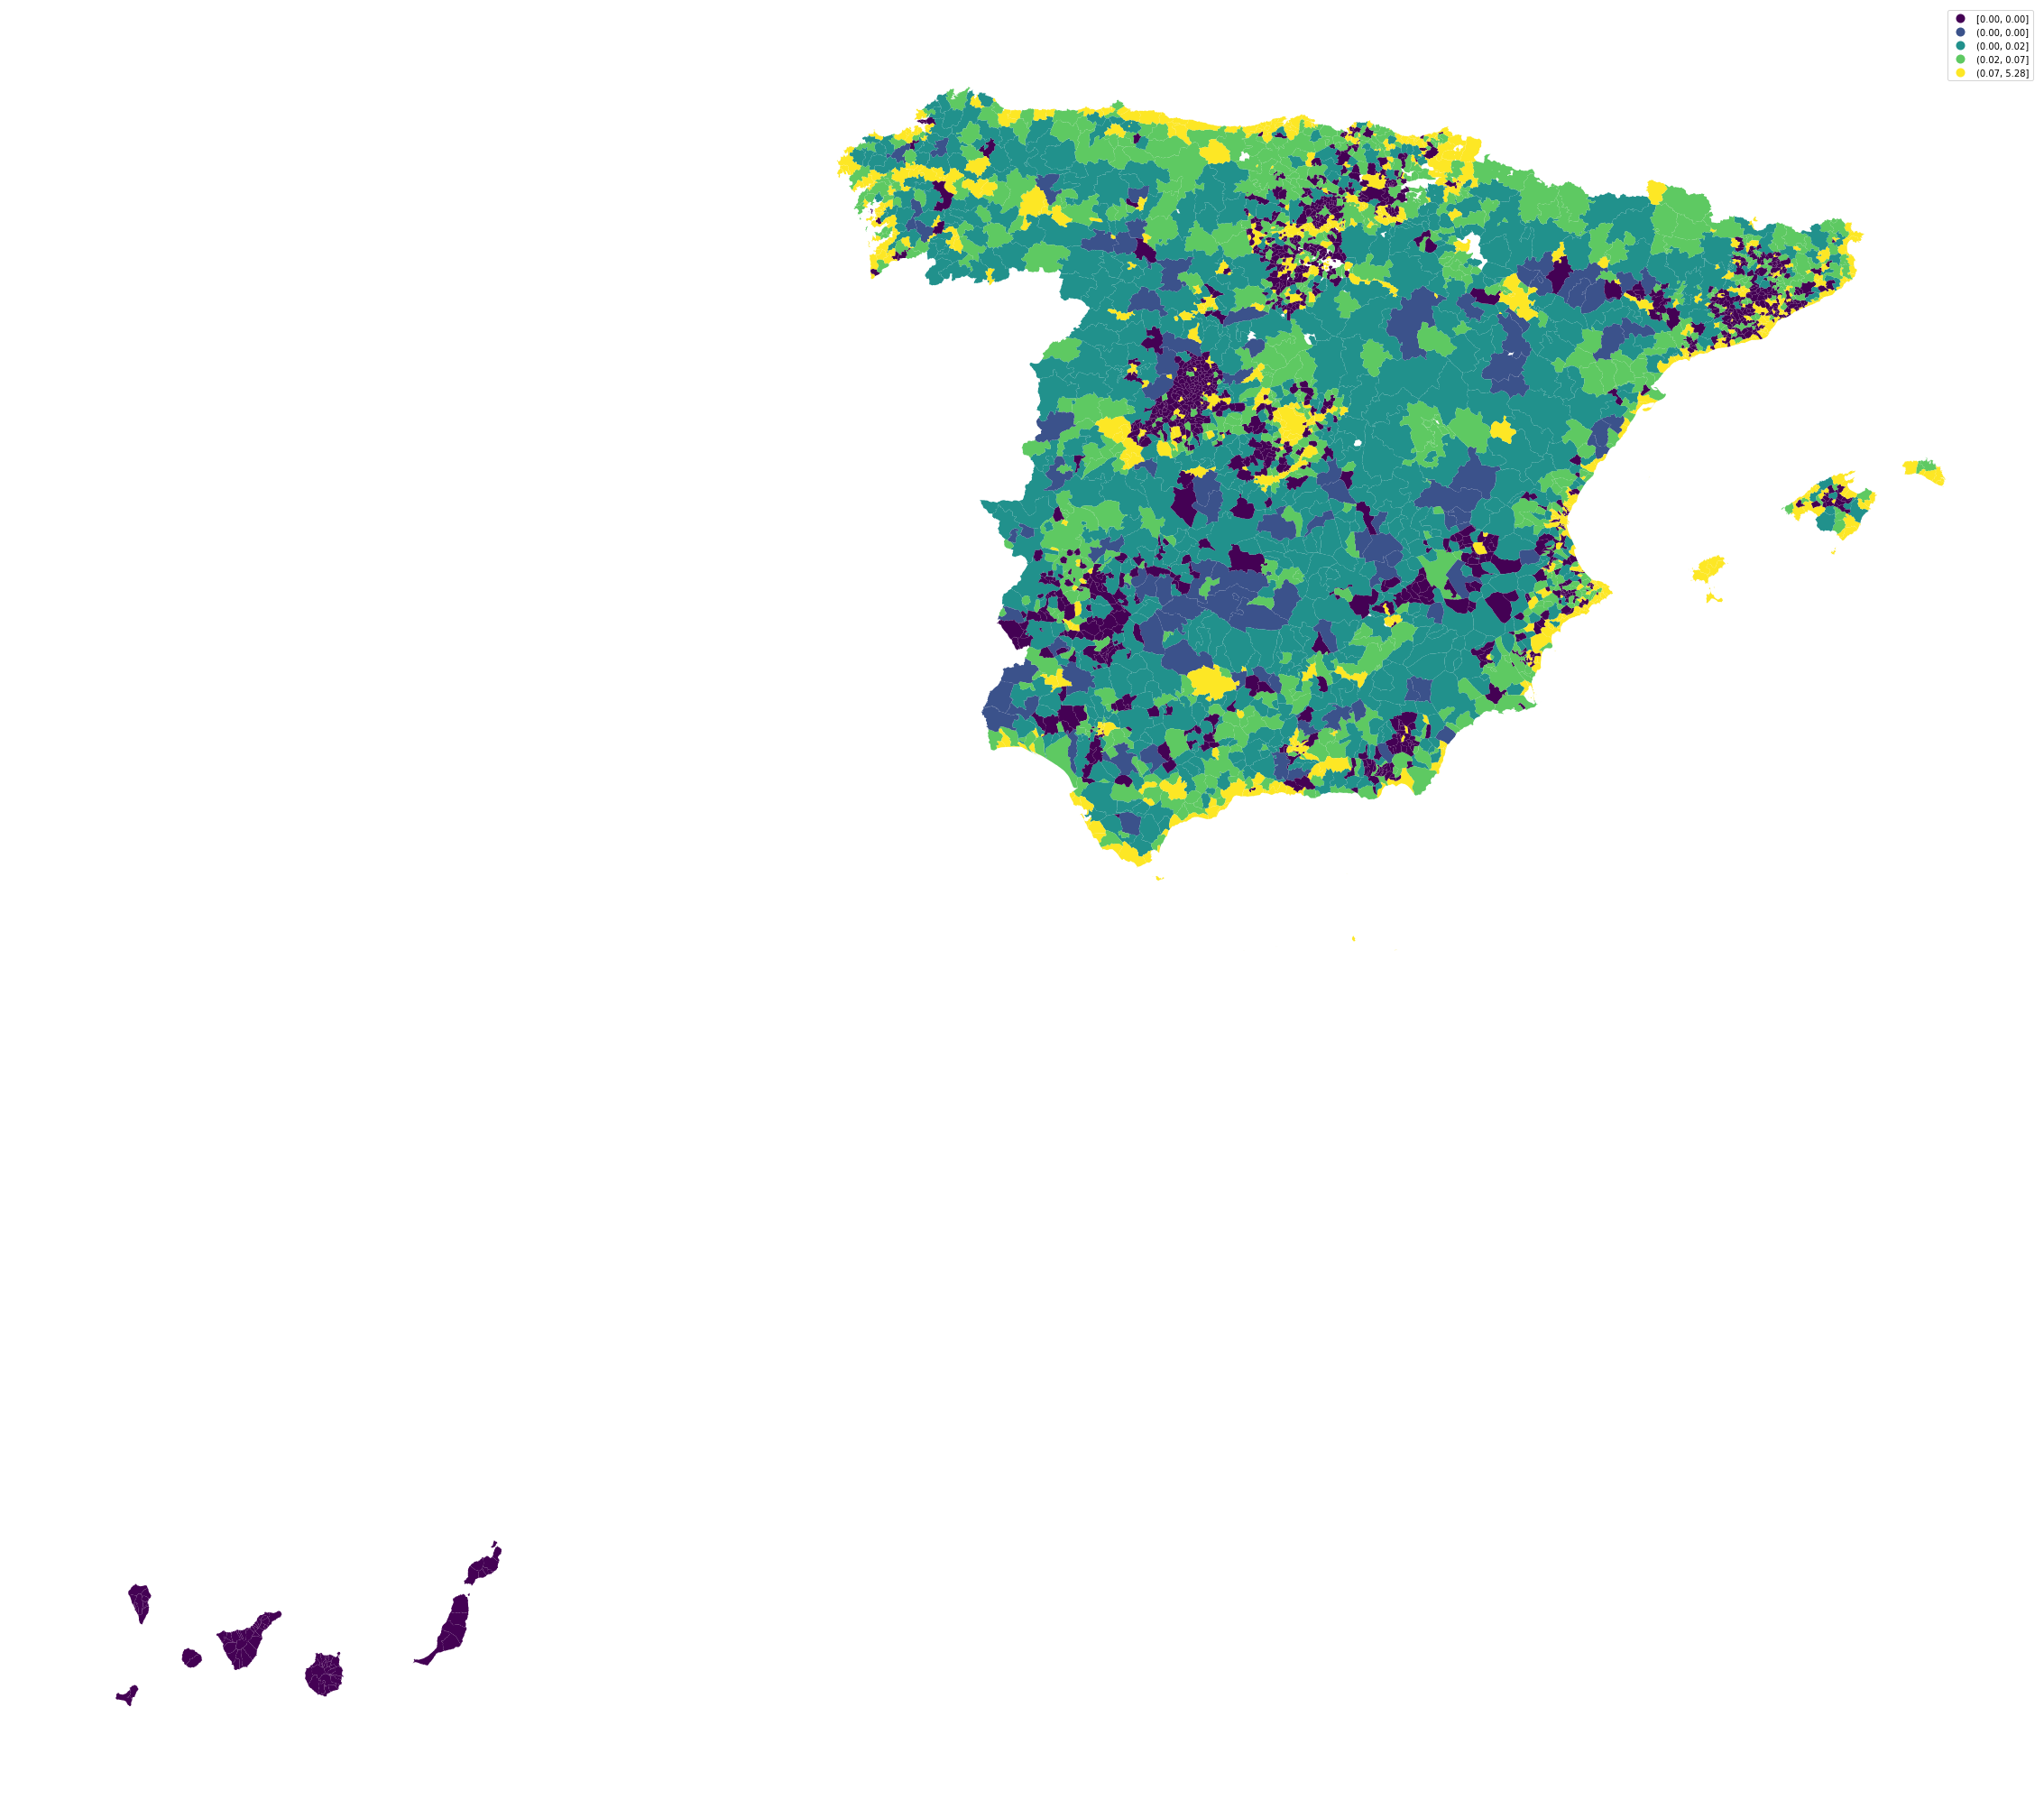

In [11]:
ax= mun_tourist_gdf.plot('hotels-per-area',figsize=(40,40), scheme='Quantiles', cmap='viridis', legend=True);

#contextily.add_basemap(ax, crs=mun_tourist_gdf.crs, source=contextily.providers.Stamen.TerrainBackground)
ax.set_axis_off()

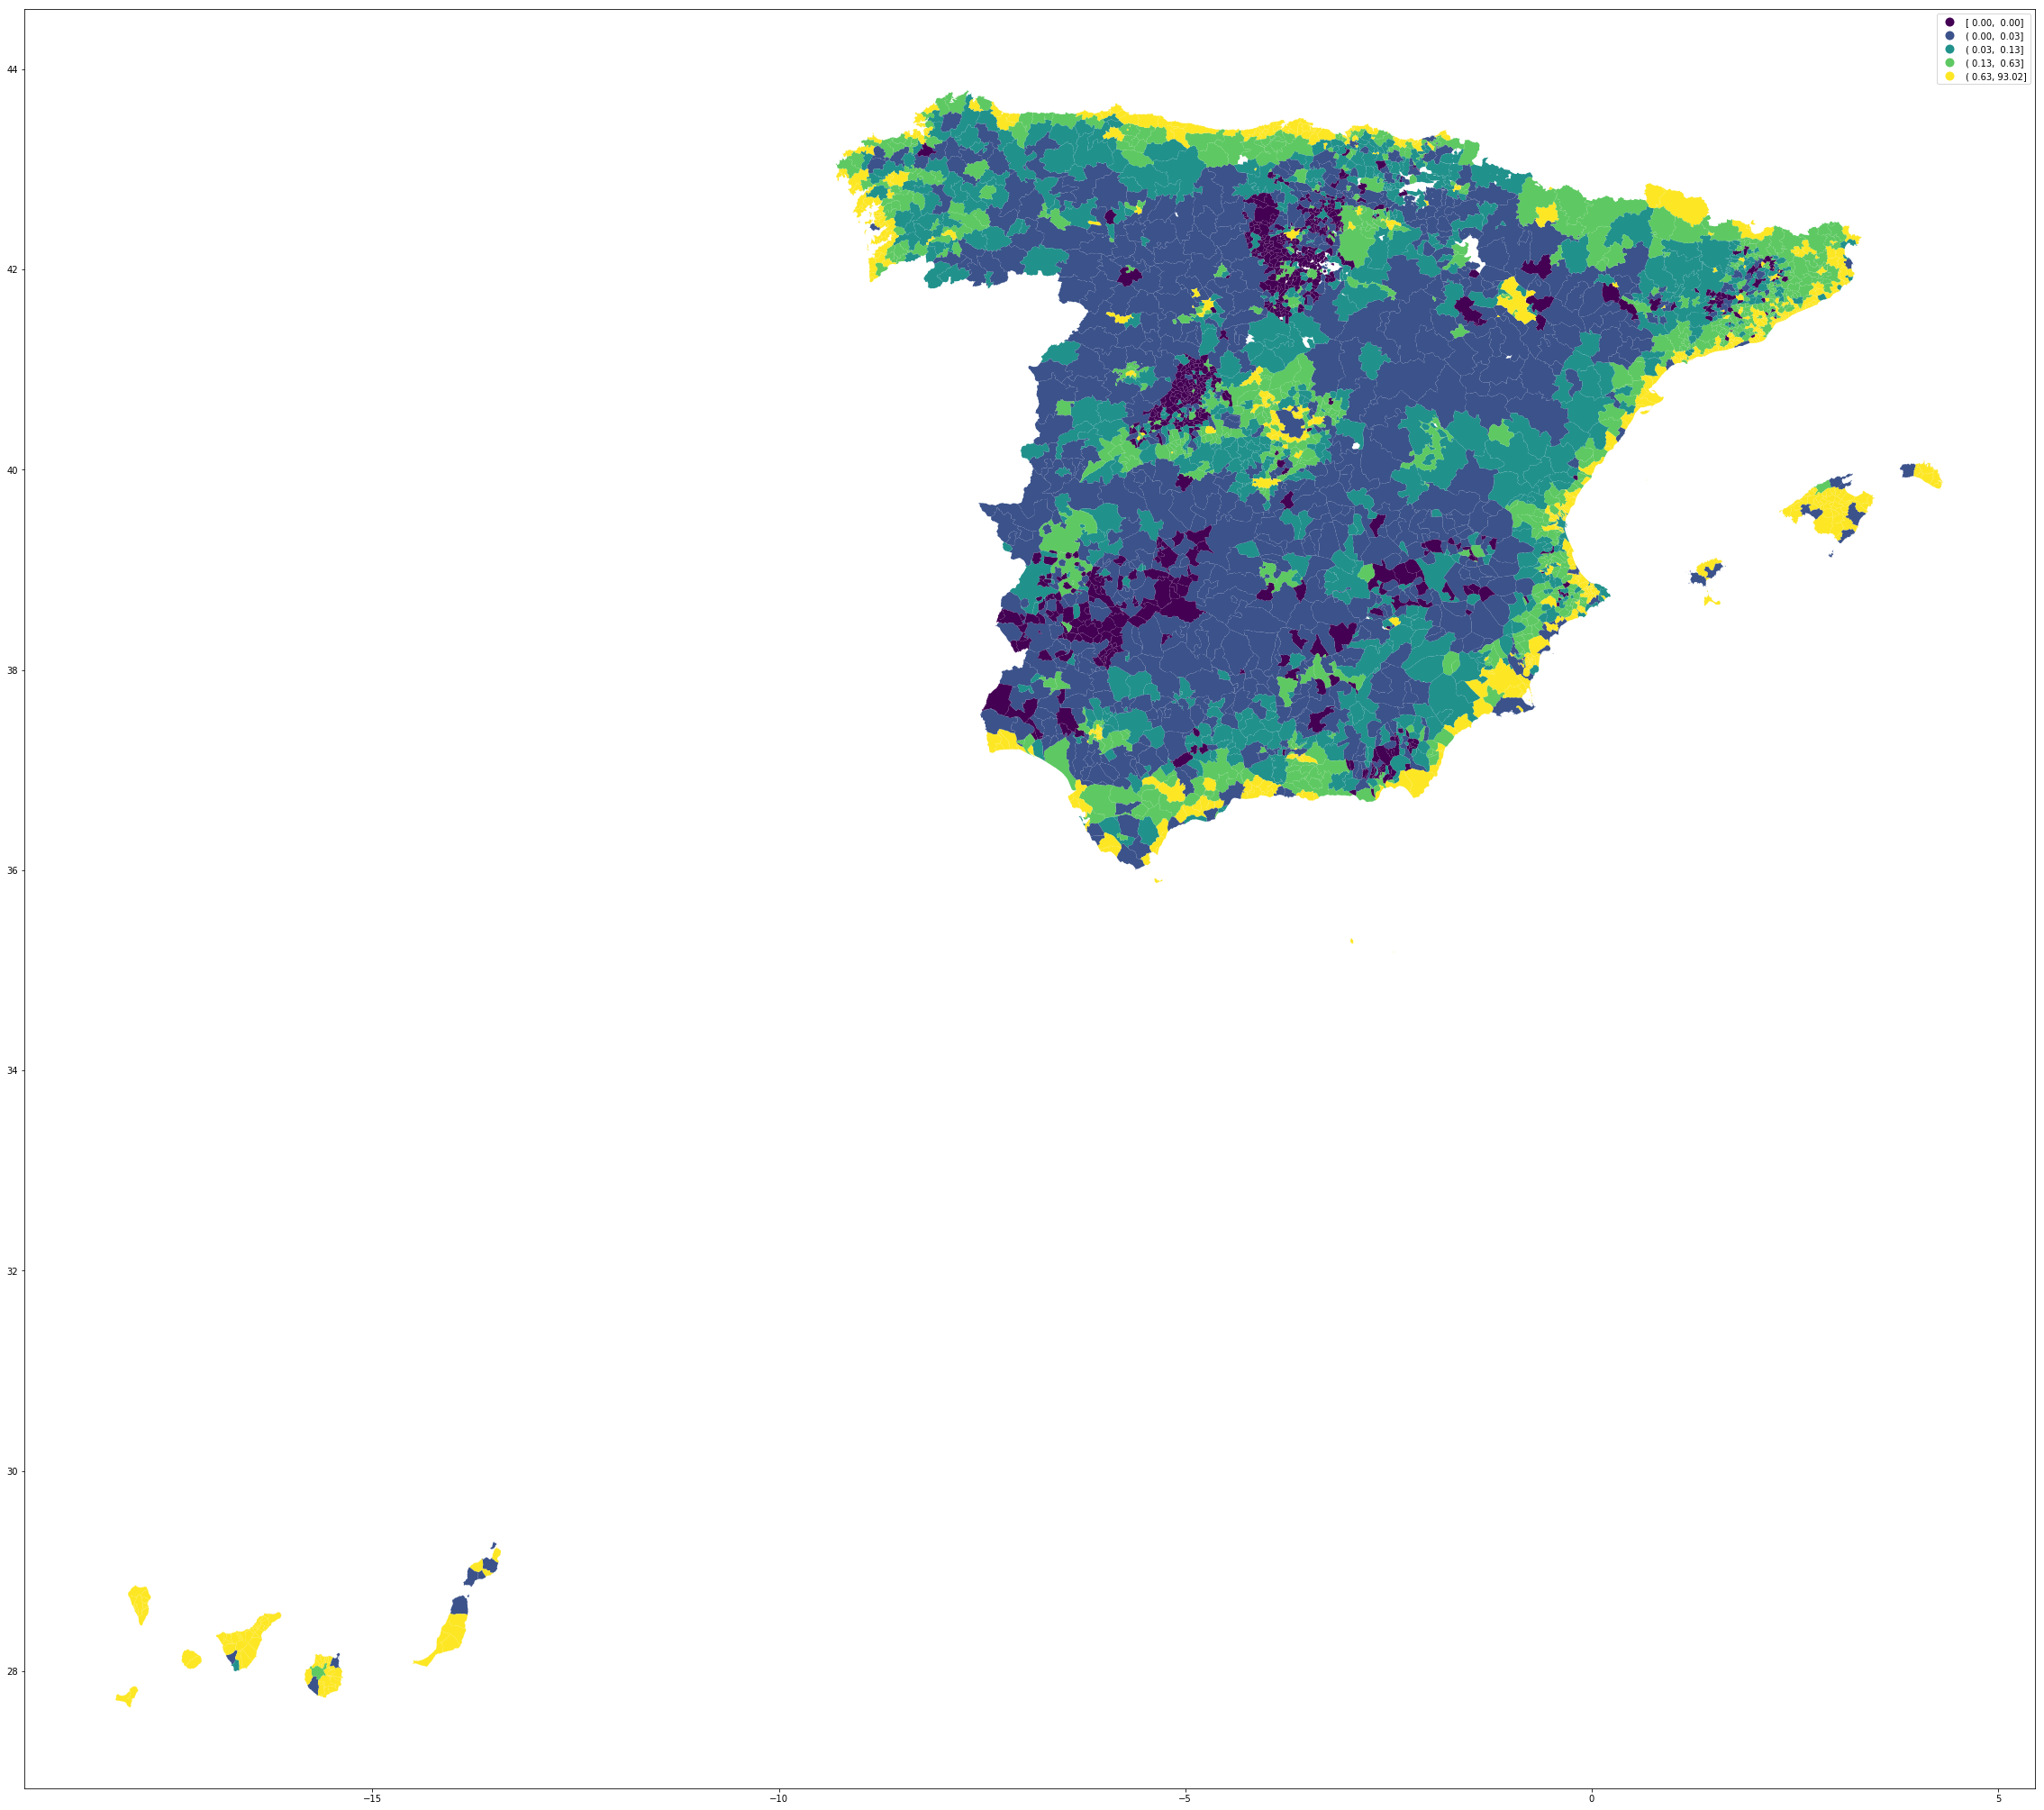

In [12]:
mun_tourist_gdf.plot('Viv-per-area',figsize=(40,40), scheme='Quantiles',  cmap='viridis', legend=True);

/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


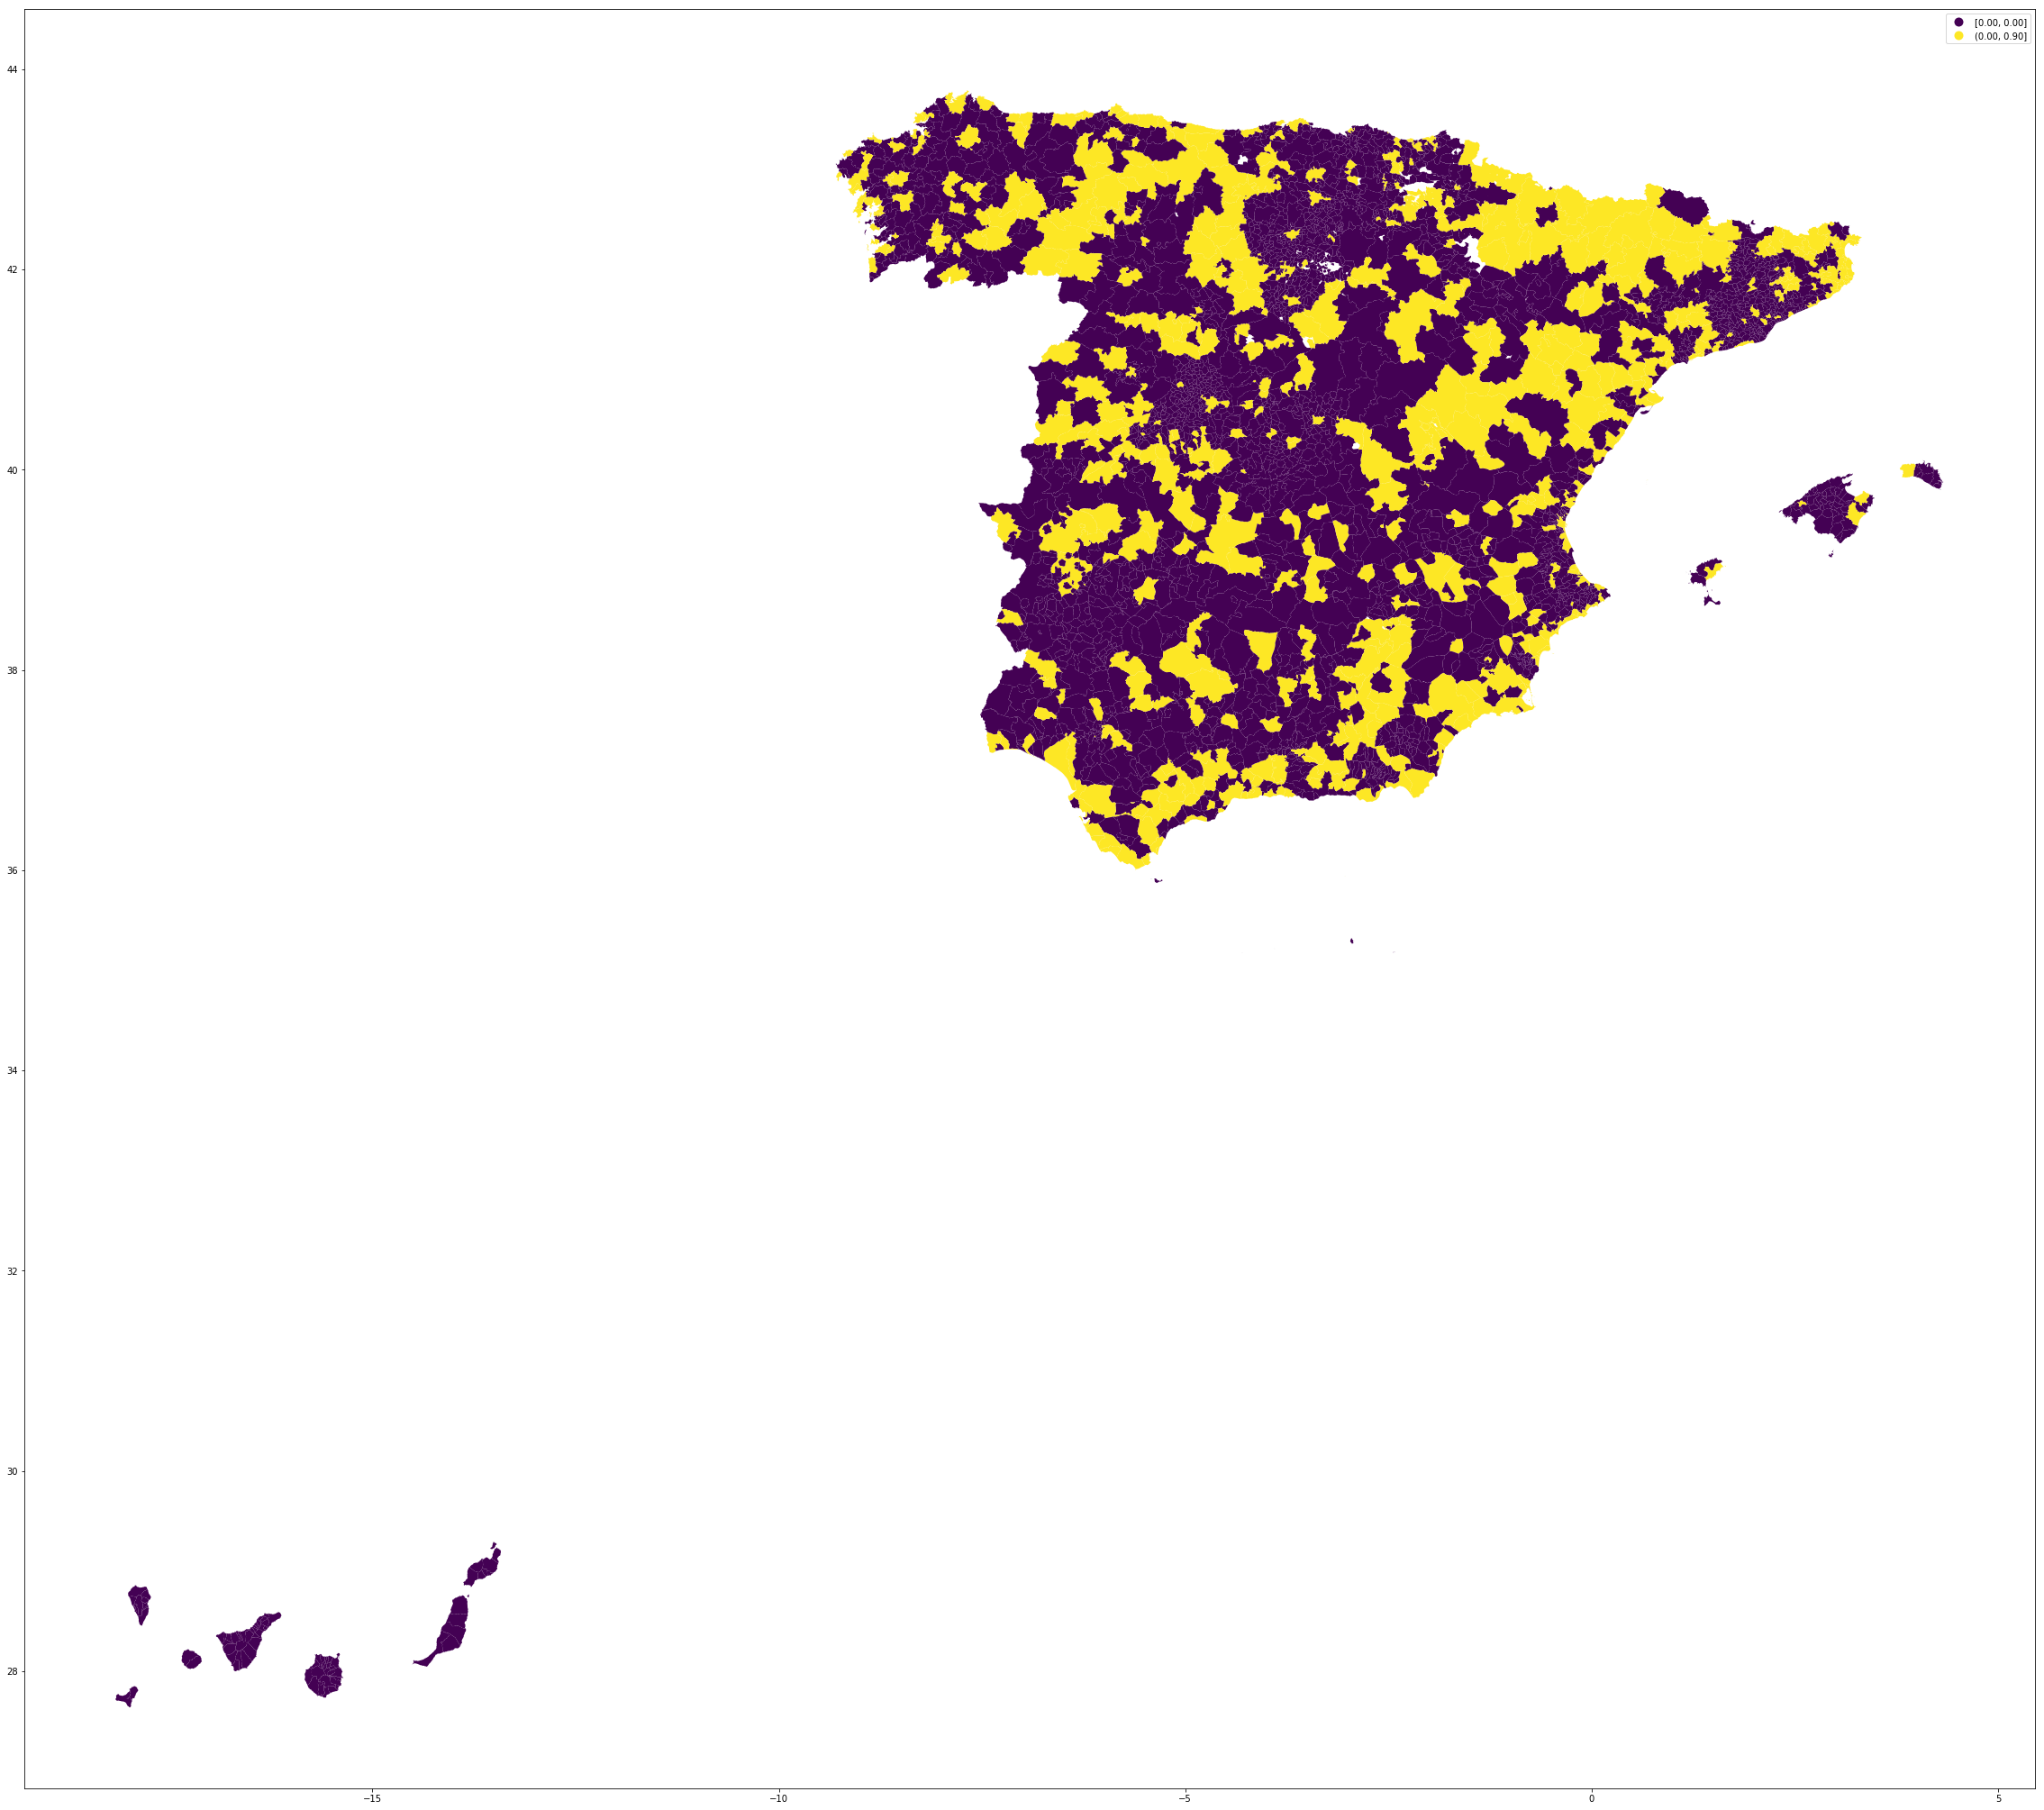

In [13]:
mun_tourist_gdf.plot('camps-per-area',figsize=(40,40), scheme='Quantiles', cmap='viridis', legend=True);

## Spatial autocorrelation

In [14]:
qW = weights.Queen.from_dataframe(mun_tourist_gdf)

/home/fterroso/python/lib/python3.6/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 94 disconnected components.
 There are 63 islands with ids: 288, 813, 814, 818, 836, 842, 1062, 1126, 1234, 1446, 1582, 1663, 1668, 1672, 1673, 1674, 1692, 1693, 1745, 1746, 1750, 1752, 1753, 2065, 2066, 2170, 2175, 2179, 2180, 2182, 2219, 2225, 2226, 2230, 2236, 2248, 2254, 2255, 2256, 2280, 2324, 2325, 2778, 2829, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3125, 3126, 3129, 3160, 3246, 3247, 3250, 3251, 3289, 3290.
  warnings.warn(message)


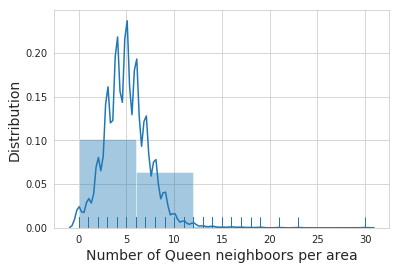

In [15]:
sns.set_style("whitegrid")
ax=sns.distplot(pd.Series(qW.cardinalities), bins=5, rug=True);
ax.set_ylabel('Distribution')
ax.set_xlabel('Number of Queen neighboors per area')
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
#plt.savefig(os.path.join('figs','queen_cardinalities_distribution.png'))

In [16]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(mun_tourist_gdf, k=6)
# Row-standardization
w.transform = 'R'

/home/fterroso/python/lib/python3.6/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [17]:
mun_tourist_gdf['camps-per-area_lag'] = weights.spatial_lag.lag_spatial(w, mun_tourist_gdf['camps-per-area'])
mun_tourist_gdf['hotels-per-area_lag'] = weights.spatial_lag.lag_spatial(w, mun_tourist_gdf['hotels-per-area'])
mun_tourist_gdf['Viv-per-area_lag'] = weights.spatial_lag.lag_spatial(w, mun_tourist_gdf['Viv-per-area'])

In [18]:
def print_autocorrelation(gdf, column_name):
    f, axs = plt.subplots(1, 2, figsize=(20, 20))
    ax1, ax2 = axs

    gdf.plot(column=column_name, cmap='viridis', scheme='quantiles',
            k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax1)
    ax1.set_axis_off()
    ax1.set_title(f"{column_name}")
    #contextily.add_basemap(ax1, crs=gdf.crs, source=contextily.providers.Stamen.TerrainBackground)

    gdf.plot(column=f'{column_name}_lag', cmap='viridis', scheme='quantiles',
            k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
    ax2.set_axis_off()
    ax2.set_title(f"{column_name}- Spatial Lag")
    #contextily.add_basemap(ax2, crs=gdf.crs, source=contextily.providers.Stamen.TerrainBackground)

    plt.show()

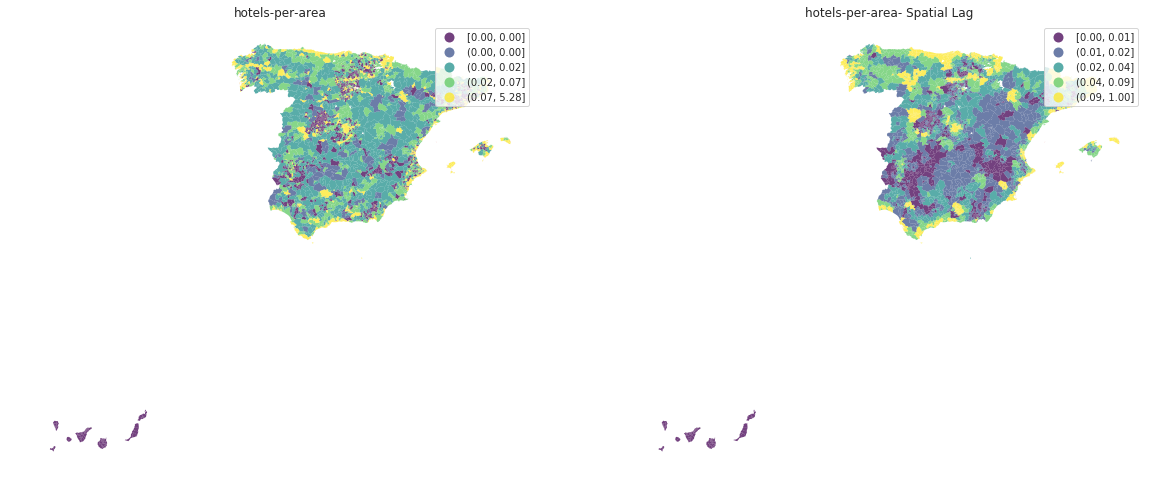

In [19]:
print_autocorrelation(mun_tourist_gdf, 'hotels-per-area')

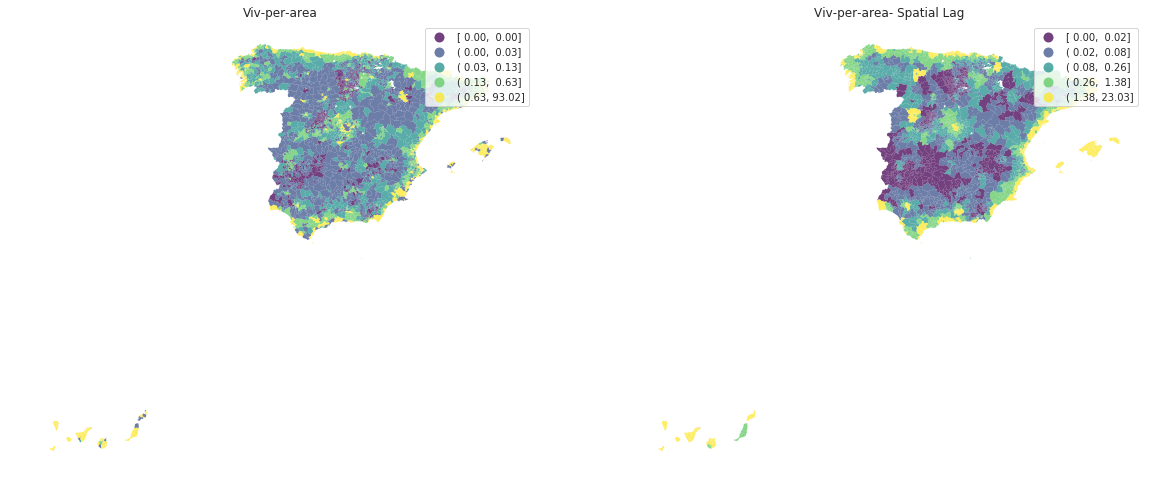

In [20]:
print_autocorrelation(mun_tourist_gdf, 'Viv-per-area')

/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/fterroso/python/lib/python3.6/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


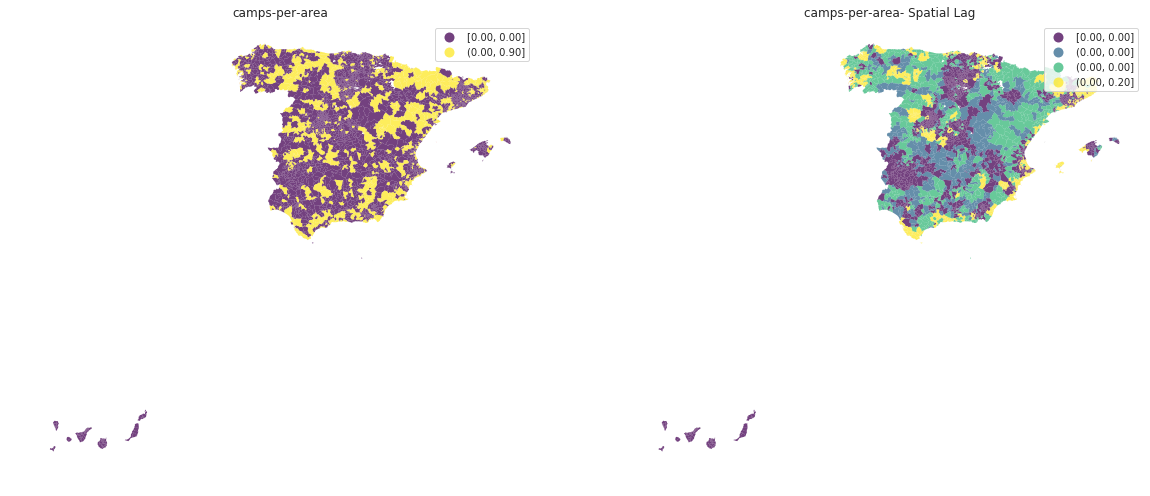

In [21]:
print_autocorrelation(mun_tourist_gdf, 'camps-per-area')

### Moran plot

In [22]:
from sklearn.preprocessing import MinMaxScaler
mun_tourist_gdf[['camps-per-area_std', 'camps-per-area_lag_std']] = MinMaxScaler().fit_transform(mun_tourist_gdf[['camps-per-area', 'camps-per-area_lag']])
mun_tourist_gdf[['Viv-per-area_std', 'Viv-per-area_lag_std']] = MinMaxScaler().fit_transform(mun_tourist_gdf[['Viv-per-area', 'Viv-per-area_lag']])
mun_tourist_gdf[['hotels-per-area_std', 'hotels-per-area_lag_std']] = MinMaxScaler().fit_transform(mun_tourist_gdf[['hotels-per-area', 'hotels-per-area_lag']])

In [23]:
mun_tourist_gdf.corr()

area_km2  Viv-total  hotels-total  camps-total  \
area_km2                 1.000000   0.050154      0.242809     0.259250   
Viv-total                0.050154   1.000000      0.191186     0.285081   
hotels-total             0.242809   0.191186      1.000000     0.219805   
camps-total              0.259250   0.285081      0.219805     1.000000   
POB20                    0.056889   0.146480      0.833938     0.064176   
HOMBRES                  0.058865   0.150687      0.832806     0.066555   
MUJERES                  0.055113   0.142693      0.834722     0.062039   
Viv-per-area            -0.109735   0.529361      0.034118     0.125530   
hotels-per-area         -0.095950   0.192168      0.490211     0.114797   
camps-per-area          -0.059075   0.180709      0.040074     0.534391   
camps-per-area_lag      -0.082712   0.171366      0.040476     0.165646   
hotels-per-area_lag     -0.117499   0.189615      0.112069     0.110458   
Viv-per-area_lag        -0.146750   0.295815      0.119283     0.090903   
camps-per-area_std      -0.059075   0.180709      0.040074     0.534391   
camps-per-area_lag_std  -0.082712   0.171366      0.040476     0.165646   
Viv-per-area_std        -0.109735   0.529361      0.034118     0.125530   
Viv-per-area_lag_std    -0.146750   0.295815      0.119283     0.090903   
hotels-per-area_std     -0.095950   0.192168      0.490211     0.114797   
hotels-per-area_lag_std -0.117499   0.189615      0.112069     0.110458   

                            POB20   HOMBRES   MUJERES  Viv-per-area  \
area_km2                 0.056889  0.058865  0.055113     -0.109735   
Viv-total                0.146480  0.150687  0.142693      0.529361   
hotels-total             0.833938  0.832806  0.834722      0.034118   
camps-total              0.064176  0.066555  0.062039      0.125530   
POB20                    1.000000  0.999840  0.999873      0.058035   
HOMBRES                  0.999840  1.000000  0.999429      0.059561   
MUJERES                  0.999873  0.999429  1.000000      0.056661   
Viv-per-area             0.058035  0.059561  0.056661      1.000000   
hotels-per-area          0.320857  0.322695  0.319134      0.336829   
camps-per-area           0.019991  0.020708  0.019348      0.297383   
camps-per-area_lag       0.012972  0.013953  0.012095      0.197080   
hotels-per-area_lag      0.100321  0.102505  0.098348      0.274672   
Viv-per-area_lag         0.123932  0.126887  0.121266      0.393574   
camps-per-area_std       0.019991  0.020708  0.019348      0.297383   
camps-per-area_lag_std   0.012972  0.013953  0.012095      0.197080   
Viv-per-area_std         0.058035  0.059561  0.056661      1.000000   
Viv-per-area_lag_std     0.123932  0.126887  0.121266      0.393574   
hotels-per-area_std      0.320857  0.322695  0.319134      0.336829   
hotels-per-area_lag_std  0.100321  0.102505  0.098348      0.274672   

                         hotels-per-area  camps-per-area  camps-per-area_lag  \
area_km2                       -0.095950       -0.059075           -0.082712   
Viv-total                       0.192168        0.180709            0.171366   
hotels-total                    0.490211        0.040074            0.040476   
camps-total                     0.114797        0.534391            0.165646   
POB20                           0.320857        0.019991            0.012972   
HOMBRES                         0.322695        0.020708            0.013953   
MUJERES                         0.319134        0.019348            0.012095   
Viv-per-area                    0.336829        0.297383            0.197080   
hotels-per-area                 1.000000        0.209334            0.182007   
camps-per-area                  0.209334        1.000000            0.203066   
camps-per-area_lag              0.182007        0.203066            1.000000   
hotels-per-area_lag             0.276658        0.189408            0.394850   
Viv-per-area_lag                0.268281        0.172487       

In [24]:
def plot_moran(df, column_name):
    f, ax = plt.subplots(1, figsize=(6, 6))
    sns.regplot(x=f'{column_name}_std', y=f'{column_name}_lag_std', 
                    ci=None, data=df, line_kws={'color':'r'})
    ax.axvline(0, c='k', alpha=0.5)
    ax.axhline(0, c='k', alpha=0.5)
    ax.set_title(f'Moran Plot - {column_name}')
    plt.show()

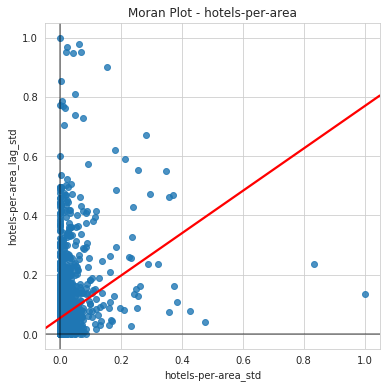

In [25]:
plot_moran(mun_tourist_gdf, 'hotels-per-area')

In [26]:
#w.transform = 'R'
#moran = esda.moran.Moran(mun_tourist_gdf['hotels-per-area'], w)
#print(moran.I, moran.p_sim)

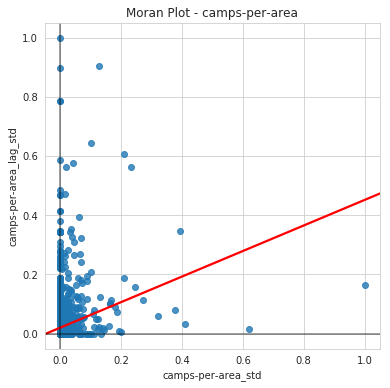

In [27]:
plot_moran(mun_tourist_gdf, 'camps-per-area')

In [28]:
#moran = esda.moran.Moran(mun_tourist_gdf['camps-per-area'], w)
#print(moran.I, moran.p_sim)

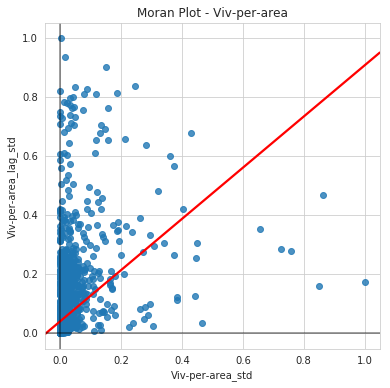

In [29]:
plot_moran(mun_tourist_gdf, 'Viv-per-area')

In [30]:
#moran = esda.moran.Moran(mun_tourist_gdf['Viv-per-area'], w)
#print(moran.I, moran.p_sim)

In [31]:
mun_tourist_gdf.columns

Index(['primary_key', 'area_km2', 'Viv-total', 'hotels-total', 'camps-total',
       'POB20', 'HOMBRES', 'MUJERES', 'Viv-per-area', 'hotels-per-area',
       'camps-per-area', 'geometry', 'camps-per-area_lag',
       'hotels-per-area_lag', 'Viv-per-area_lag', 'camps-per-area_std',
       'camps-per-area_lag_std', 'Viv-per-area_std', 'Viv-per-area_lag_std',
       'hotels-per-area_std', 'hotels-per-area_lag_std'],
      dtype='object')

In [32]:
mun_tourist_gdf[['Viv-per-area', 'hotels-per-area', 'camps-per-area', 'Viv-per-area_lag',  'hotels-per-area_lag', 'camps-per-area_lag']].corr()

Viv-per-area  hotels-per-area  camps-per-area  \
Viv-per-area             1.000000         0.336829        0.297383   
hotels-per-area          0.336829         1.000000        0.209334   
camps-per-area           0.297383         0.209334        1.000000   
Viv-per-area_lag         0.393574         0.268281        0.172487   
hotels-per-area_lag      0.274672         0.276658        0.189408   
camps-per-area_lag       0.197080         0.182007        0.203066   

                     Viv-per-area_lag  hotels-per-area_lag  camps-per-area_lag  
Viv-per-area                 0.393574             0.274672            0.197080  
hotels-per-area              0.268281             0.276658            0.182007  
camps-per-area               0.172487             0.189408            0.203066  
Viv-per-area_lag             1.000000             0.499367            0.455296  
hotels-per-area_lag          0.499367             1.000000            0.394850  
camps-per-area_lag           0.455296             0.394850            1.000000

## Cluster cities

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [34]:
X= mun_tourist_gdf[['Viv-per-area', 'hotels-per-area', 'camps-per-area']]

In [35]:
X

Viv-per-area  hotels-per-area  camps-per-area
0         0.011900         0.023800             0.0
1         0.032196         0.028976             0.0
2         0.004537         0.008318             0.0
3         0.028348         0.006299             0.0
4         0.035972         0.001998             0.0
...            ...              ...             ...
3290     16.518372         0.000000             0.0
3291      0.021778         0.000000             0.0
3292      3.558222         0.000000             0.0
3293      5.544060         0.000000             0.0
3294      5.158203         0.000000             0.0

[3295 rows x 3 columns]

In [36]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [37]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

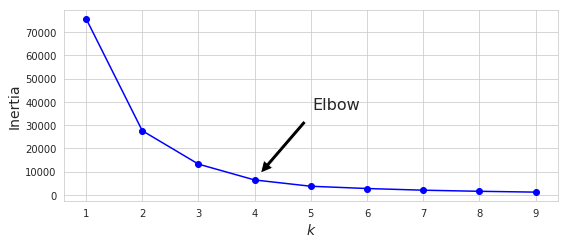

In [38]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
#save_fig("inertia_vs_k_plot")
plt.tight_layout()
plt.show()

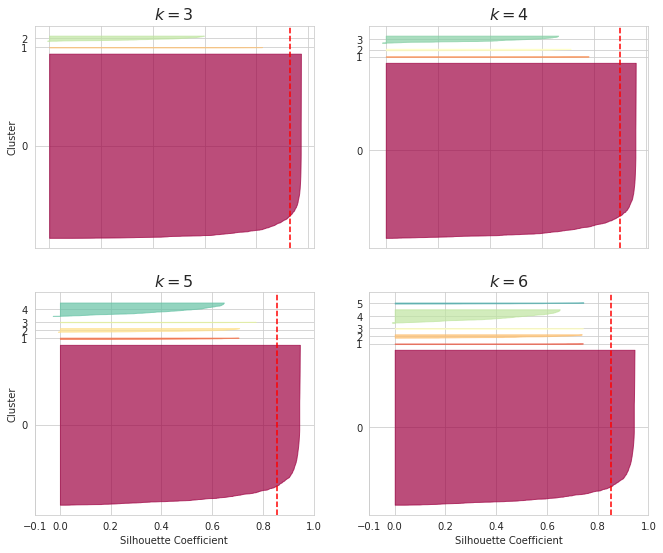

In [39]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

In [40]:
km = KMeans(n_clusters=5).fit(X)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
mun_tourist_gdf['cluster_label'] = km.labels_
mun_tourist_gdf['cluster_label'] = mun_tourist_gdf['cluster_label'].astype(str)

Target features: ['Viv-per-area', 'hotels-per-area', 'camps-per-area']

In [41]:
km.cluster_centers_

array([[2.17320984e-01, 4.49126331e-02, 2.60821925e-03],
       [3.21744741e+01, 4.21244574e-01, 1.12901610e-01],
       [1.39729303e+01, 3.92922922e-01, 2.71274529e-02],
       [7.53229458e+01, 9.59118601e-01, 2.98098134e-02],
       [4.23204801e+00, 1.31175583e-01, 9.20200230e-03]])

In [42]:
mun_tourist_gdf['cluster_label'].value_counts()

0    2950
4     248
2      67
1      24
3       6
Name: cluster_label, dtype: int64

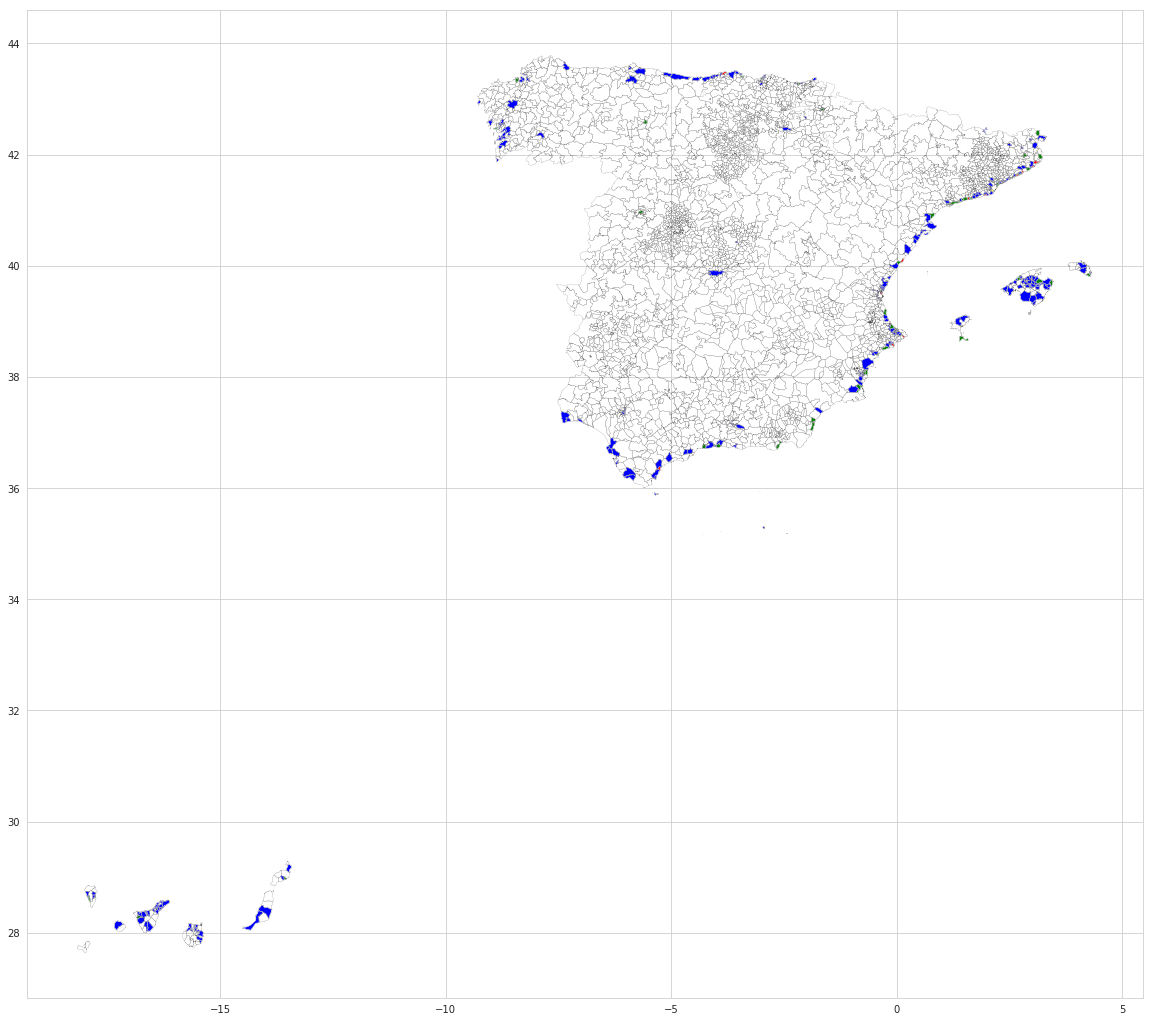

In [43]:
ax=mun_tourist_gdf.boundary.plot(facecolor="none", edgecolor="black",figsize=(20,20), linewidth=0.1);
mun_tourist_gdf[mun_tourist_gdf['cluster_label']=='1'].plot(ax=ax, color='red', linewidth=0.5);
mun_tourist_gdf[mun_tourist_gdf['cluster_label']=='2'].plot(ax=ax, color='green', linewidth=0.5);
mun_tourist_gdf[mun_tourist_gdf['cluster_label']=='3'].plot(ax=ax, color='yellow', linewidth=0.5);
mun_tourist_gdf[mun_tourist_gdf['cluster_label']=='4'].plot(ax=ax, color='blue', linewidth=0.5);

In [44]:
print("That's all folks!")

That's all folks!
